In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import tifffile

In [12]:
# !pip install tifffile

In [3]:
a = sc.read_visium('/storage1/fs1/dinglab/Active/Projects/estorrs/deep-spatial-genomics/data/brca/HT397B1-S1H2A4/spaceranger_outs/outs')
a.var_names_make_unique()
a

/home/estorrs/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
a.layers['counts'] = a.X.copy()

sc.pp.normalize_total(a, inplace=True)
sc.pp.log1p(a)
sc.pp.highly_variable_genes(a, flavor="seurat", n_top_genes=2000)

sc.pp.pca(a)
sc.pp.neighbors(a)
sc.tl.umap(a)
sc.tl.leiden(a, key_added="clusters")

In [5]:
df = pd.read_csv('/storage1/fs1/dinglab/Active/Projects/estorrs/deep-spatial-genomics/data/brca/HT397B1-S1H2A4/alla_annotations.csv', index_col=0)
df

,Immune
Barcode,
AAACAAGTATCTCCCA-1,NaN
AAACACCAATAACTGC-1,Tumor
AAACAGAGCGACTCCT-1,NaN
AAACAGCTTTCAGAAG-1,NaN
AAACAGGGTCTATATT-1,NaN
...,...
TTGTTCTAGATACGCT-1,NaN
TTGTTGGCAATGACTG-1,NaN
TTGTTTCACATCCAGG-1,NaN


In [6]:
set(df['Immune'])

{'Fibroblasts', 'Immune', 'Tumor', nan}

In [7]:
a.obs['alla_label'] = [df.loc[b, 'Immune'] for b in a.obs.index]
a.obs

,in_tissue,array_row,array_col,clusters,alla_label
AAACAAGTATCTCCCA-1,1,50,102,0,NaN
AAACACCAATAACTGC-1,1,59,19,9,Tumor
AAACAGAGCGACTCCT-1,1,14,94,3,NaN
AAACAGCTTTCAGAAG-1,1,43,9,11,NaN
AAACAGGGTCTATATT-1,1,47,13,1,NaN
...,...,...,...,...,...
TTGTTCTAGATACGCT-1,1,21,3,11,NaN
TTGTTGGCAATGACTG-1,1,76,30,6,NaN
TTGTTTCACATCCAGG-1,1,58,42,2,NaN
TTGTTTCATTAGTCTA-1,1,60,30,6,NaN


In [2]:
img = tifffile.imread('/storage1/fs1/dinglab/Active/Projects/estorrs/deep-spatial-genomics/data/brca/HT397B1-S1H2A4/full_res_he.tif')
img.shape

(19918, 19620, 3)

In [9]:
img.dtype

dtype('uint8')

In [10]:
a

AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'clusters', 'alla_label'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [14]:
a.uns['full_res_he'] = img

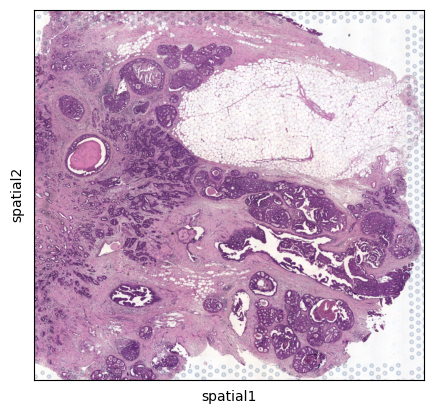

In [15]:
sc.pl.spatial(a)

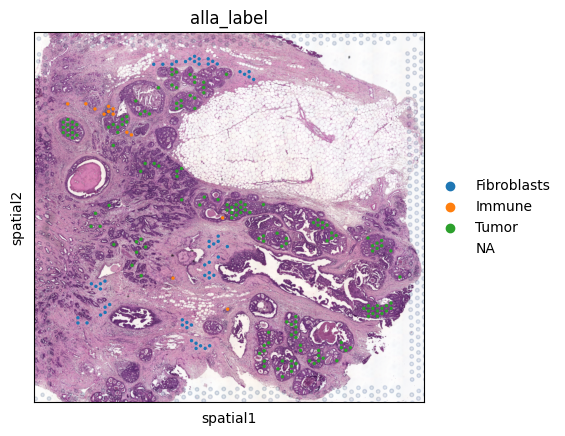

In [16]:
sc.pl.spatial(a, color='alla_label')

In [17]:
a.write_h5ad('/storage1/fs1/dinglab/Active/Projects/estorrs/deep-spatial-genomics/data/brca/HT397B1-S1H2A4/adata.h5ad')